# Experiment 1: Document at various level for short dataset(law:non-law)

## 1. Article level

In the file each article is seperated by 'NEW_ARTICLE'

In [1]:
#import
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as s
import dataframe_image as dfi
import networkx as nx

C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


### law-texts-all.txt

In [2]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    document = ''
    i=0
    with open( os.path.join(path, file_name) ,"r") as fin:
        data = fin.read()
        words = data.split()
        fin.seek(0)
        print('Number of words in text file :', len(words))
        for line in fin.readlines():
            text = line.strip()
            i=i+1
            if text !='':
                document = document+text
                if text == 'NEW_ARTICLE':
                    documents_list.append(document)
                    document = ''
        documents_list.append(document)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles,len(words)

In [3]:
document_list,titles,word_count=load_data("","law-texts-all.txt")

Number of words in text file : 45105
Total Number of Documents: 3


In [4]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        tokens = [i for i in tokens if len(i)>3]
        print(tokens)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [5]:
clean_text=preprocess_data(document_list)

['regina', 'secretary', 'state', 'homedepartment', 'parte', 'hindley', 'court', 'appeal', '2000', '152hearing', 'dates', 'october', 'november', '19985', 'november', '1998catchwords', 'prisons', 'prisoners', 'rights', 'release', 'licence', 'mandatory', 'life', 'sentence', 'prisoner', 'tariff', 'element', 'determinate', 'length', 'provisionally', 'fixed', 'communicated', 'prisoner', 'whole', 'life', 'tariff', 'subsequently', 'fixed', 'communicated', 'policy', 'review', 'whole', 'life', 'tariff', 'limited', 'considerations', 'retribution', 'deterrence', 'later', 'amended', 'take', 'account', 'exceptional', 'circumstances', 'whether', 'increase', 'from', 'determinate', 'tariff', 'whole', 'life', 'tariff', 'lawful', 'whether', 'review', 'policy', 'lawful', 'criminal', 'justice', '1991', 'crime', 'sentences', '1997', '29headnote', '1966', 'applicant', 'defendant', 'were', 'convicted', 'murder', 'children', 'received', 'mandatory', 'life', 'sentences', 'applicant', 'also', 'convicted', 'being

In [6]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [7]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    #print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [8]:
# LSA Model
number_of_topics=1
words=word_count
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_law =dict(model.show_topic(0, topn=words))##dict and encoding matrix values

In [9]:
top_words = dict(model.show_topic(0,topn=5)) 

In [10]:
top_words

{'tariff': 0.3329384971656328,
 'secretari': 0.33147720211273785,
 'prison': 0.2491591199567468,
 'life': 0.2361170851923663,
 'sentenc': 0.22952296370340305}

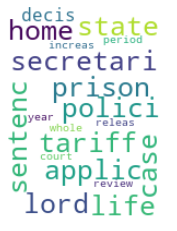

In [11]:
from wordcloud import WordCloud
text = dict(model.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph.png')

Cosine-similarity

In [12]:
# LSA Model
number_of_topics = 3 #
words = word_count
model = create_gensim_lsa_model(clean_text,number_of_topics,words)

a=pd.DataFrame()

for i in range(number_of_topics):
    words_from_law =dict(model.show_topic(i, topn=words))
    b=pd.DataFrame(words_from_law,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled.png')

cosine-similarity
             tariff secretari    prison      life   sentenc
tariff            1  0.983798  0.752886  0.981629  0.574831
secretari  0.983798         1  0.684687  0.938672  0.427497
prison     0.752886  0.684687         1  0.853834  0.833889
life       0.981629  0.938672  0.853834         1  0.712817
sentenc    0.574831  0.427497  0.833889  0.712817         1


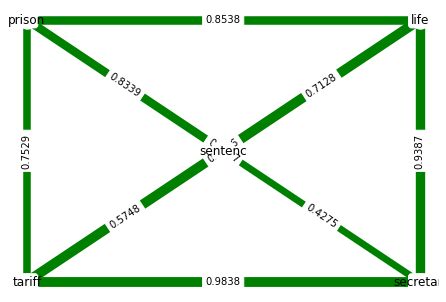

In [13]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.5)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='green',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig.png')

### non-law-all.txt

In [14]:
document_list,titles,word_count=load_data("","non-law-all.txt")

Number of words in text file : 34133
Total Number of Documents: 4


In [15]:
clean_text=preprocess_data(document_list)

['hardest', 'case', 'myra', 'hindley', 'life', 'sentences', 'rule', 'lawmyra', 'hindley', 'still', 'prison', 'years', 'after', 'conviction', 'twomurders', 'perpetrated', 'with', 'lover', 'brady', 'these', 'crimes', 'known', 'asthe', 'moors', 'murders', 'deeply', 'embedded', 'collective', 'consciousnessof', 'society', 'exaggeration', 'that', 'hindley', 'popularlyconsidered', 'embodiment', 'evil', 'over', 'last', 'years', 'hasmounted', 'legal', 'challenges', 'home', 'secretary', 'right', 'determine', 'thelength', 'detention', 'this', 'paper', 'argue', 'that', 'this', 'single', 'hardcase', 'irrevocable', 'effect', 'penal', 'policy', 'united', 'kingdom', 'thesis', 'that', 'hindley', 'mounted', 'these', 'challenges', 'positionof', 'home', 'secretary', 'hardened', 'main', 'because', 'politicalimpact', 'executive', 'action', 'that', 'could', 'lead', 'release', 'becausehindley', 'mandatory', 'life', 'prisoner', 'case', 'profoundimpact', 'relating', 'such', 'prisoners', 'prevented', 'fromremain

In [16]:
# LSA Model
number_of_topics=1
words=word_count
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_non_law =dict(model.show_topic(0, topn=words))#dict and encoding matrix values

In [17]:
dict(model.show_topic(0,topn=5))

{'judg': 0.3207357836732983,
 'evid': 0.30924440695933275,
 'west': 0.28040281700237185,
 'trial': 0.27724857451973234,
 'case': 0.2281040582305672}

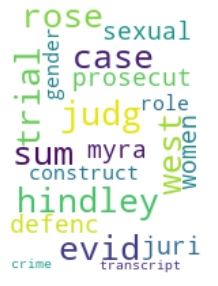

In [18]:
from wordcloud import WordCloud
text = dict(model.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph1.png')

cosine similarity

In [19]:
# LSA Model
number_of_topics = 4 #
words = word_count
model = create_gensim_lsa_model(clean_text,number_of_topics,words)

a=pd.DataFrame()

for i in range(number_of_topics):
    words_from_non_law =dict(model.show_topic(i, topn=words))
    b=pd.DataFrame(words_from_law,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled1.png')

cosine-similarity
      judg evid west trial case
judg     1    1   -1     1    1
evid     1    1   -1     1    1
west    -1   -1    1    -1   -1
trial    1    1   -1     1    1
case     1    1   -1     1    1


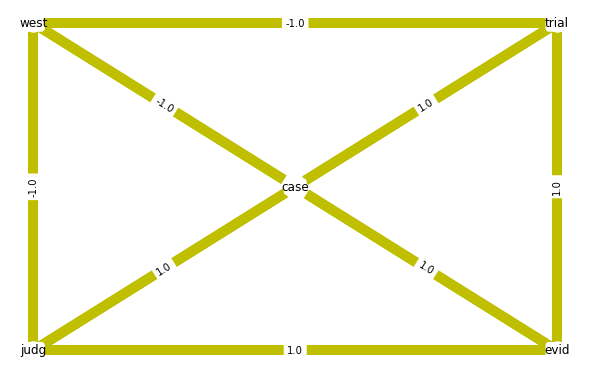

In [20]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(2)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.5)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='y',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig1.png')

## 2. 2-3 paragraphs

### law-texts-all.txt

In [21]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    document = ''
    i=0
    with open( os.path.join(path, file_name) ,"r") as fin:
        data = fin.read()
        words = data.split()
        fin.seek(0)
        print('Number of words in text file :', len(words))
        for word in words:
                i=i+1
                document = document+word+' '
                if i == 200:
                    documents_list.append(document)
                    document,i = '',0
                    if len(documents_list) == 2:
                        break
    print("Total Number of Documents:",len(documents_list))
    #titles.append( text[0:min(len(text),100)] )
    return documents_list,titles,len(words)

In [22]:
document_list,titles,word_count=load_data("","law-texts-all.txt")

Number of words in text file : 45105
Total Number of Documents: 2


In [23]:
clean_text=preprocess_data(document_list)

['regina', 'secretary', 'state', 'homedepartment', 'parte', 'hindley', 'court', 'appeal', '2000', 'hearing', 'dates', 'october', 'november', '1998', 'november', '1998', 'catchwords', 'prisons', 'prisoners', 'rights', 'release', 'licence', 'mandatory', 'life', 'sentence', 'prisoner', 'tariff', 'element', 'determinate', 'length', 'provisionally', 'fixed', 'communicated', 'prisoner', 'whole', 'life', 'tariff', 'subsequently', 'fixed', 'communicated', 'policy', 'review', 'whole', 'life', 'tariff', 'limited', 'considerations', 'retribution', 'deterrence', 'later', 'amended', 'take', 'account', 'exceptional', 'circumstances', 'whether', 'increase', 'from', 'determinate', 'tariff', 'whole', 'life', 'tariff', 'lawful', 'whether', 'review', 'policy', 'lawful', 'criminal', 'justice', '1991', 'crime', 'sentences', '1997', 'headnote', '1966', 'applicant', 'defendant', 'were', 'convicted', 'murder', 'children', 'received', 'mandatory', 'life', 'sentences', 'applicant', 'also', 'convicted', 'being',

In [24]:
# LSA Model
number_of_topics=1
words=word_count
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_law =dict(model.show_topic(0, topn=words))##dict and encoding matrix values

In [25]:
words_from_law =dict(model.show_topic(0, topn=words))
dict(model.show_topic(0, topn=5))

{'tariff': 0.28528676133914843,
 'life': 0.24509619427164592,
 'prison': 0.2450961942716459,
 'would': 0.2419339607783407,
 'sentenc': 0.20411506883081754}

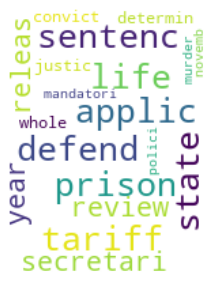

In [26]:
from wordcloud import WordCloud
text = dict(model.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph2.png')

In [27]:
# LSA Model
number_of_topics = 2 #
words = word_count
model = create_gensim_lsa_model(clean_text,number_of_topics,words)

a=pd.DataFrame()

for i in range(number_of_topics):
    words_from_law =dict(model.show_topic(i, topn=words))
    b=pd.DataFrame(words_from_law,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled2.png')

cosine-similarity
           tariff     prison       life      would   sentenc
tariff          1   0.977417   0.977417   0.261261  0.987197
prison   0.977417          1          1  0.0513785   0.99861
life     0.977417          1          1  0.0513785   0.99861
would    0.261261  0.0513785  0.0513785          1  0.103953
sentenc  0.987197    0.99861    0.99861   0.103953         1


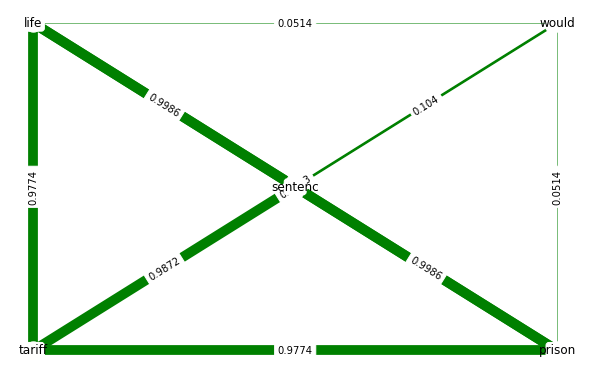

In [28]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.5)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='green',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig2.png')

### non-law-all.txt

In [29]:
document_list,titles,word_count=load_data("","non-law-all.txt")

Number of words in text file : 34133
Total Number of Documents: 2


In [30]:
clean_text=preprocess_data(document_list)

['hardest', 'case', 'myra', 'hindley', 'life', 'sentences', 'rule', 'myra', 'hindley', 'still', 'prison', 'years', 'after', 'conviction', 'murders', 'perpetrated', 'with', 'lover', 'brady', 'these', 'crimes', 'known', 'moors', 'murders', 'deeply', 'embedded', 'collective', 'consciousness', 'society', 'exaggeration', 'that', 'hindley', 'popularly', 'considered', 'embodiment', 'evil', 'over', 'last', 'years', 'mounted', 'legal', 'challenges', 'home', 'secretary', 'right', 'determine', 'length', 'detention', 'this', 'paper', 'argue', 'that', 'this', 'single', 'hard', 'case', 'irrevocable', 'effect', 'penal', 'policy', 'united', 'kingdom', 'thesis', 'that', 'hindley', 'mounted', 'these', 'challenges', 'position', 'home', 'secretary', 'hardened', 'main', 'because', 'political', 'impact', 'executive', 'action', 'that', 'could', 'lead', 'release', 'because', 'hindley', 'mandatory', 'life', 'prisoner', 'case', 'profound', 'impact', 'relating', 'such', 'prisoners', 'prevented', 'from', 'remaini

In [31]:
# LSA Model
number_of_topics=1
words=word_count
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_law =dict(model.show_topic(0, topn=words))##dict and encoding matrix values

In [32]:
words_from_law =dict(model.show_topic(0, topn=words))
dict(model.show_topic(0, topn=5))

{'life': 0.4246250746536416,
 'prison': 0.3661564361559013,
 'sentenc': 0.29154943908792924,
 'hindley': 0.25768521514592296,
 'posit': 0.233080800590189}

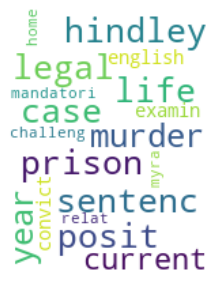

In [33]:
from wordcloud import WordCloud
text = dict(model.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph3.png')

In [34]:
# LSA Model
number_of_topics = 2 #
words = word_count
model = create_gensim_lsa_model(clean_text,number_of_topics,words)

a=pd.DataFrame()

for i in range(number_of_topics):
    words_from_non_law =dict(model.show_topic(i, topn=words))
    b=pd.DataFrame(words_from_law,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled3.png')

cosine-similarity
        life prison sentenc hindley posit
life       1      1       1       1     1
prison     1      1       1       1     1
sentenc    1      1       1       1     1
hindley    1      1       1       1     1
posit      1      1       1       1     1


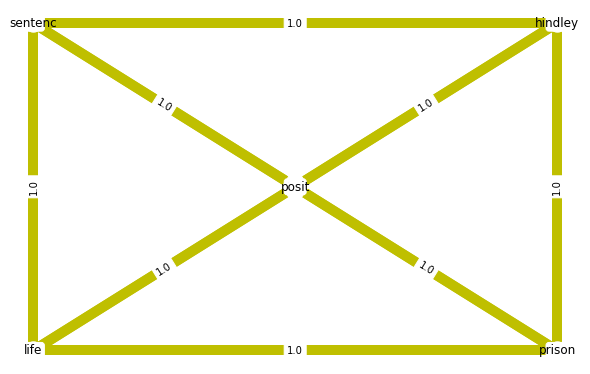

In [35]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(2)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.5)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='y',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig3.png')

### 3. Paragraph level

### law-text-all.txt

In [36]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        data = fin.read()
        words = data.split()
        fin.seek(0)
        print('Number of words in text file :', len(words))
        for line in fin.readlines():
            text = line.strip()
            if text !='':
                documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles,len(words)

In [37]:
document_list,titles,word_count=load_data("","law-texts-all.txt")

Number of words in text file : 45105
Total Number of Documents: 450


In [38]:
clean_text=preprocess_data(document_list)

['regina', 'secretary', 'state', 'homedepartment', 'parte', 'hindley']
['court', 'appeal']
['2000']
['hearing', 'dates', 'october', 'november', '1998']
['november', '1998']
['catchwords']
['prisons', 'prisoners', 'rights', 'release', 'licence', 'mandatory', 'life', 'sentence', 'prisoner', 'tariff', 'element', 'determinate', 'length', 'provisionally', 'fixed', 'communicated', 'prisoner', 'whole', 'life', 'tariff', 'subsequently', 'fixed', 'communicated', 'policy', 'review', 'whole', 'life', 'tariff', 'limited', 'considerations', 'retribution', 'deterrence', 'later', 'amended', 'take', 'account', 'exceptional', 'circumstances', 'whether', 'increase', 'from', 'determinate', 'tariff', 'whole', 'life', 'tariff', 'lawful', 'whether', 'review', 'policy', 'lawful', 'criminal', 'justice', '1991', 'crime', 'sentences', '1997']
['headnote']
['1966', 'applicant', 'defendant', 'were', 'convicted', 'murder', 'children', 'received', 'mandatory', 'life', 'sentences', 'applicant', 'also', 'convicted', 

In [39]:
# LSA Model
number_of_topics=1
words=word_count
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_law =dict(model.show_topic(0, topn=words))##dict and encoding matrix values

In [40]:
words_from_law =dict(model.show_topic(0, topn=words))
dict(model.show_topic(0, topn=5))

{'tariff': -0.37242371124962215,
 'secretari': -0.32565854745632866,
 'prison': -0.26232409276082286,
 'state': -0.2461890481490516,
 'life': -0.23430496041101387}

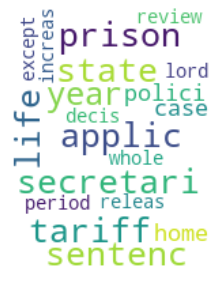

In [41]:
from wordcloud import WordCloud
text = dict(model.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph4.png')

In [42]:
# LSA Model
number_of_topics = 10 #
words = word_count
model = create_gensim_lsa_model(clean_text,number_of_topics,words)

a=pd.DataFrame()

for i in range(number_of_topics):
    words_from_law =dict(model.show_topic(i, topn=words))
    b=pd.DataFrame(words_from_law,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled4.png')

cosine-similarity
              tariff  secretari     prison      state       life
tariff             1  0.0159934  0.0172753  0.0649858   0.342006
secretari  0.0159934          1  0.0688696   0.707711   0.043583
prison     0.0172753  0.0688696          1   -0.12927    0.48122
state      0.0649858   0.707711   -0.12927          1  0.0306189
life        0.342006   0.043583    0.48122  0.0306189          1


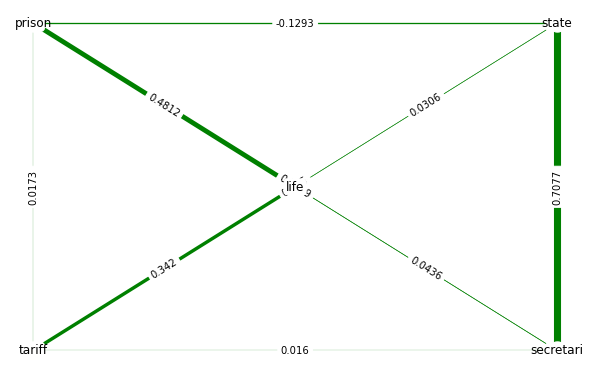

In [43]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.5)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='green',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig4.png')

### non-law-all.txt

In [44]:
document_list,titles,word_count=load_data("","non-law-all.txt")

Number of words in text file : 34133
Total Number of Documents: 3038


In [45]:
clean_text=preprocess_data(document_list)

['hardest', 'case']
['myra', 'hindley', 'life', 'sentences']
['rule']
['myra', 'hindley', 'still', 'prison', 'years', 'after', 'conviction']
['murders', 'perpetrated', 'with', 'lover', 'brady', 'these', 'crimes', 'known']
['moors', 'murders', 'deeply', 'embedded', 'collective', 'consciousness']
['society', 'exaggeration', 'that', 'hindley', 'popularly']
['considered', 'embodiment', 'evil', 'over', 'last', 'years']
['mounted', 'legal', 'challenges', 'home', 'secretary', 'right', 'determine']
['length', 'detention', 'this', 'paper', 'argue', 'that', 'this', 'single', 'hard']
['case', 'irrevocable', 'effect', 'penal', 'policy', 'united', 'kingdom']
['thesis', 'that', 'hindley', 'mounted', 'these', 'challenges', 'position']
['home', 'secretary', 'hardened', 'main', 'because', 'political']
['impact', 'executive', 'action', 'that', 'could', 'lead', 'release', 'because']
['hindley', 'mandatory', 'life', 'prisoner', 'case', 'profound']
['impact', 'relating', 'such', 'prisoners', 'prevented', '

In [46]:
# LSA Model
number_of_topics=1
words=word_count
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_non_law =dict(model.show_topic(0, topn=words))#dict and encoding matrix values

In [47]:
words_from_law =dict(model.show_topic(0, topn=words))
dict(model.show_topic(0, topn=5))

{'hindley': 0.6376449065816215,
 'myra': 0.5863790793574026,
 'west': 0.23125276808879772,
 'case': 0.182376891856216,
 'trial': 0.14824565775281365}

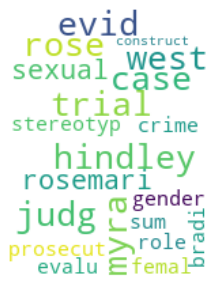

In [48]:
from wordcloud import WordCloud
text = dict(model.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph5.png')

In [49]:
# LSA Model
number_of_topics = 10 #
words = word_count
model = create_gensim_lsa_model(clean_text,number_of_topics,words)

a=pd.DataFrame()

for i in range(number_of_topics):
    words_from_non_law =dict(model.show_topic(i, topn=words))
    b=pd.DataFrame(words_from_law,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled5.png')

cosine-similarity
        hindley myra west case trial
hindley       1    1    1    1     1
myra          1    1    1    1     1
west          1    1    1    1     1
case          1    1    1    1     1
trial         1    1    1    1     1


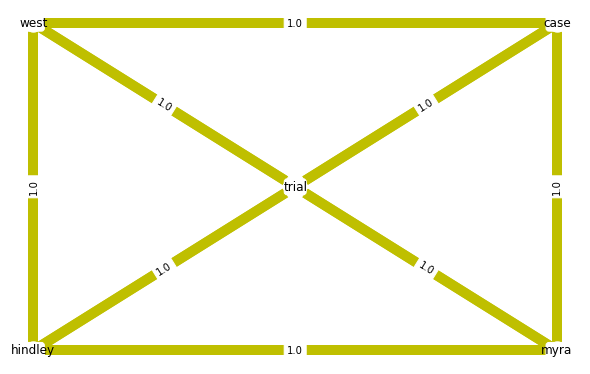

In [50]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(2)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.5)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='y',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig5.png')